# Projet 2: Concevez une application au service de la santé publique
## Notebook d'analyse des données
## Analyse univariée

### Chargement des modules Python

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### fonctions utiles
#### fonctions d'affichages

In [3]:
def print_random(data, n):
    """
    function to print n random rows in the dataframe
    parameters : data : pd.DataFrame
                 n : int
    returns : None
    """
    i = np.random.randint(0, len(data), size=n)
    print(data.iloc[i])

#### fonction pour les float

In [4]:
def is_lower(value, target=np.inf) :
    """
    function to verify if the value is lower than the target value
    parameters : value : float 
                 target : float
    returns : value if the value is lower than the target,
              np.NaN if the value is higher
    """
    if pd.notnull(value) :
        if value <= target :
            return value
        else :
            print(f"{value} is higher than the target {target}")
            return np.NaN
    else :
        return np.NaN

In [5]:
def is_higher(value, target=-np.inf) :
    """
    function to verify if the value is higher than the target value
    parameters : value : float 
                 target : float
    returns : value if the value is higher than the target,
              np.NaN if the value is lower
    """
    if pd.notnull(value) :
        if value >= target :
            return value
        else :
            print(f"{value} is lower than the target {target}")
            return np.NaN
    else :
        return np.NaN

#### fonctions pour les variables list

In [6]:
def remove_lists(df, column=None) :
    "not used"
    if column not in df.columns :
        raise ValueError(f"{columns} is not a column of the dataframe")
    odf = pd.DataFrame(columns = df.columns)
    for i in range(0, len(df)):
        line = df.iloc[i]
        if len(line[column]) == 0:
            line[column] = np.NaN
            odf = odf.append(line)
        else :
            for val in line[column] :
                oline = line
                oline[column] = val
                odf = odf.append(oline)
    return odf
    #odf = df.copy()
    #print(df.columns, odf.columns)
    #odf = odf.drop(labels=column, axis=1)
    #print(odf.columns)

In [7]:
def create_list(value) :
    """
    function to create list from str chains
    if the type of value is not str, return empty list
    
    parameters : value : str
    
    returns : list
    """
    if type(value) == str :
        if value.startswith("[") :
            value = value[1:]
        if value.endswith(']') :
            value = value[:-1]
        return value.split(',')
    elif (type(value) == int or type(value) == float) and pd.notnull(value) :
        print(f"Type of {value} is {type(value)} : not expected => ignored ")
        return []
    else :
        return []

#### fonctions pour les modification / créations de variables

In [8]:
def carbon_grade(value) :
    """
    function to define a carbon grade. 
    the carbon grade is a value between a and e, function of the carbon-footprint.
    The grade is that of the "loi climat" in France.
    
    parameters : value : float or int 
                    carbon-footprint
    return : str 
                str between a and e
    """
    if type(value) in [float, int] :
        if pd.notnull(value) :
            if value <= 80 :
                return "a"
            elif value <= 180 :
                return "b"
            elif value <= 330 :
                return "c"
            elif value <= 530 :
                return "d"
            else :
                return "e"
        else :
            return np.NaN
    else :
        print(f"Value of type {type(value)} has not a carbon grade")
        return np.NaN

In [9]:
def is_filled(value) :
    """
    function to indicate if a value is filled or not
    parameters : value : str, float, int or list
    returns : Bool 
    """
    if type(value) in [str, float, int] :
        return pd.notnull(value)
    elif type(value) == list :
        return len(value) > 0
    else :
        print(f"Variable of type {type(value)} is not supported")
        

In [10]:
def int2grade(value) :
    """
    function to convert a int to a grade in letter
    parameters : int 
    return : str
    """
    letters = ["a","b","c","d","e"]
    if pd.notnull(value) :
        return letters[int(value)]
    else :
        return np.NaN        

In [11]:
def grade2int(value) :
    """
    function to convert a letter to a integer
    parameters : str
    return : int
    """
    letters = ["a","b","c","d","e"]
    if pd.notnull(value) :
        return letters.index(value)
    else :
        return np.NaN    

### Variables globales

In [12]:
DATA_FILE = "database_cleaned.csv"

### Chargement du dataset nettoyé

In [13]:
if os.path.isfile(DATA_FILE) :
    DATA = pd.read_csv(DATA_FILE, sep=";", low_memory=False)
    SIZE = len(DATA)
    N_VAR = len(DATA.columns)
    print(f"Number of lines     = {SIZE}")
    print(f"Number of variables = {N_VAR}")
    print(f"Variables           = {', '.join(DATA.columns)}")
else :
    raise ValueError(f"{DATA_FILE} is not a file")

Number of lines     = 320772
Number of variables = 17
Variables           = code, url, product_name, categories_tags, nutrition_grade_fr, carbon-footprint_100g, origins_tags, manufacturing_places_tags, additives_n, energy_100g, fat_100g, saturated-fat_100g, fruits-vegetables-nuts_100g, sodium_100g, sugars_100g, pnns_groups_1, pnns_groups_2


### Recréation des listes dans les variables de type list

In [14]:
for col in ['categories_tags', 'origins_tags', 'manufacturing_places_tags'] :
    DATA[col] = DATA[col].apply(create_list)

In [15]:
print(DATA[DATA['origins_tags'].str.len() != 0 ]['origins_tags'])

177               [france]
236       [united-kingdom]
259              [germany]
267              [germany]
268              [germany]
                ...       
320637         [australia]
320669             [spain]
320726            [norway]
320743         [sri-lanka]
320758            [france]
Name: origins_tags, Length: 19871, dtype: object


###  Création de nouvelles variables
#### Création d'un carbone score

In [16]:
DATA['carbon_grade'] = DATA['carbon-footprint_100g'].apply(carbon_grade)

In [17]:
print_random(DATA[pd.notnull(DATA['carbon_grade'])][["carbon_grade", "carbon-footprint_100g"]], 10)

       carbon_grade  carbon-footprint_100g
200893            e                  855.0
182561            b                   82.8
249897            a                   73.0
287268            d                  345.0
200964            d                  510.0
200152            e                 1065.0
283534            a                    0.0
249949            c                  312.0
199880            e                  945.0
296562            a                    9.1


#### Création de variables qui donnent le nombre d'éléments dans les variables de type list

In [18]:
for col in ['categories_tags', 'origins_tags', 'manufacturing_places_tags'] :
    DATA['nb_'+col] = DATA[col].apply(len)

In [19]:
print_random(DATA[pd.notnull(DATA['nb_categories_tags'])][["nb_categories_tags", "categories_tags"]], 10)

        nb_categories_tags                                    categories_tags
269560                   3  [sugary-snacks, confectioneries, chocolate-cov...
228700                   5  [corbieres, alcoholic-beverages, beverages, wi...
231876                   3  [frozen-foods, frozen-pizzas-and-pies, frozen-...
276684                   3      [sugary-snacks, biscuits-and-cakes, biscuits]
60318                    0                                                 []
2460                     0                                                 []
142142                   0                                                 []
158092                   0                                                 []
90782                    0                                                 []
167232                   0                                                 []


### statistiques sur le nombre d'individus correctement renseigné pour chaque variable
#### creation d'un dataframe indiquant si la variable est renseignée

In [20]:
data_filled = pd.DataFrame()
for col in DATA.columns :
    data_filled[col] = DATA[col].apply(is_filled)

In [21]:
data_filled.head()

,code,url,product_name,categories_tags,nutrition_grade_fr,carbon-footprint_100g,origins_tags,manufacturing_places_tags,additives_n,energy_100g,...,saturated-fat_100g,fruits-vegetables-nuts_100g,sodium_100g,sugars_100g,pnns_groups_1,pnns_groups_2,carbon_grade,nb_categories_tags,nb_origins_tags,nb_manufacturing_places_tags
0,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
1,True,True,True,False,True,False,False,False,True,True,...,True,False,True,True,False,False,False,True,True,True
2,True,True,True,False,True,False,False,False,True,True,...,True,False,True,True,False,False,False,True,True,True
3,True,False,True,False,True,False,False,False,True,True,...,True,False,True,True,False,False,False,True,True,True
4,True,True,True,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,True,True,True


#### Représentation en diagramme en baton

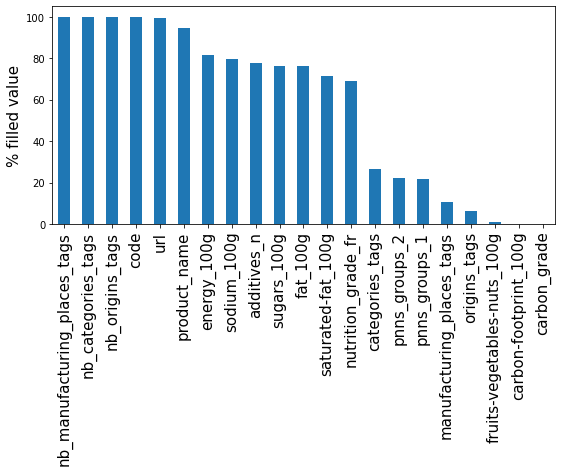

In [23]:
df = data_filled[data_filled == True].count()/SIZE*100
df = df.sort_values(ascending=False)

df.plot(kind="bar", figsize=(9,4))
plt.xticks(fontsize=15)
plt.ylabel("% filled value", fontsize=15)
plt.show()

Après la première analyse comportant les variables code, url, product_name , nutrition_grade, categories_tags, manufacturing_places_tags, origins_tags et carbon-footprint_100g,  
il apparait que trop peu de variables sont correctement renseignées pour pouvoir créer l'application.  
Le choix a été fait d'ajouter des variables, un retour au nettoyage est nécessaire.  
  
Après le rajout de variables, 10 variables (en plus de celles représentant la longueur des listes), sont renseignées pour plus de 60% des produits.  
On remarque que les variables pnns_groups_1 et pnns_groups_2 sont aussi peu remplies que la variable categories.
Pour le développement de l'application, il faudra envisager un algorithme de clustering pour catégoriser les produits avec un taux de remplissage satisfaisant.  

### statistiques sur les noms des produits
#### nombre de mots dans le nom des produits

Moyenne du nombre de mots = 3.76
Mediane du nombre de mots = 3.00
Déviation standard du nombre de mots = 2.31
Nombre de mots représentant 95% des noms de produits = 8.39


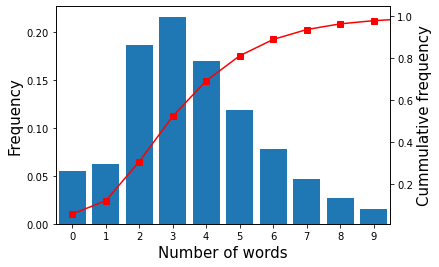

In [24]:
DATA['product_name_n_words'] = DATA['product_name'].apply(lambda x: x.split('_') if (pd.notnull(x)) else []).apply(len)
df = DATA['product_name_n_words'].value_counts(normalize=True).sort_index()
print(f"Moyenne du nombre de mots = {DATA['product_name_n_words'].mean():.2f}")
print(f"Mediane du nombre de mots = {DATA['product_name_n_words'].median():.2f}")
print(f"Déviation standard du nombre de mots = {DATA['product_name_n_words'].std():.2f}")
print("Nombre de mots représentant 95% des noms de produits = "+\
      f"{DATA['product_name_n_words'].mean()+2*DATA['product_name_n_words'].std():.2f}")
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(df.index, df.values)
plt.xlim(-0.5, 9.5)
plt.xticks(np.arange(0,10))
ax2.plot(df.index, df.cumsum().values, linestyle='-', marker='s', color='red')
ax1.set_xlabel("Number of words", fontsize=15)
ax1.set_ylabel("Frequency", fontsize=15)
ax2.set_ylabel('Cummulative frequency', fontsize=15)
plt.show()

#### identification des valeurs aberrantes
on concidère que les noms de produits avec plus de 9 mots

220632    l'original_tartare,_ail_&_fines_herbes_(8_port...
320163    chocolat_mylk_à_la_mandarine_et_à_la_gubinge_a...
121426    earth_&_vine_provisions,_grilling_&_dipping_sa...
217437    abbaye_de_sept-fons_-_confiture_extra_-_abrico...
113087    smoke_master,_black_forest_ham_with_natural_ju...
292890    tendre_croc'_l'original_jambon_fromage_-_pain_...
95386     gourmet_cheese_made_with_fresh_milk_and_cream,...
168240    barts_bakery,_the_best_oatmeal_raisin_cookies_...
19879     super_premium_san_francisco's_official_ice_cre...
101268    pure_fruit,_100%_juice_smoothie,_berry_flavore...
295617    betty_bossi,_good_food_:_grilled_chicken_&_kal...
210508    sauce_vinaigrette_au_vinaigre_de_vin_rouge_et_...
104967    fra_diavolo_arribiata_-_hot_and_spicy_pasta_sa...
229976    olives_vertes_tournantes_et_picholines_du_maro...
244104    yaourt_de_brebis_brassé_à_la_confiture_de_ceri...
137790    original_sauce_seasoned_pork_st._louis_style_s...
153781    pom,_antioxidant_super_tea,_po

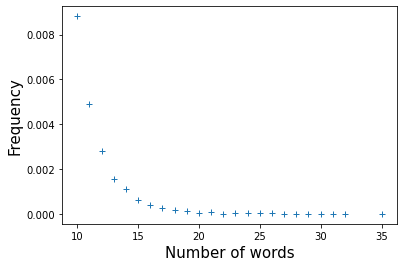

In [25]:
print_random(DATA['product_name'][DATA['product_name_n_words']>9], 20)
df = DATA['product_name_n_words'][DATA['product_name_n_words']>9].value_counts().sort_index()
df = df/SIZE
df.plot(linestyle='', marker='+')
plt.xlabel("Number of words", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.show()

on remarque que des noms de produits peuvent contenir jusqu'à 35 mots,  
Au delà de 15 mots, la fréquence est très faible (< 0.1%)

### Statistique sur les variables quanlitatives
#### Statistique sur le nutriscore

a    0.161087
b    0.154808
c    0.205859
d    0.283726
e    0.194521
Name: nutrition_grade_fr, dtype: float64


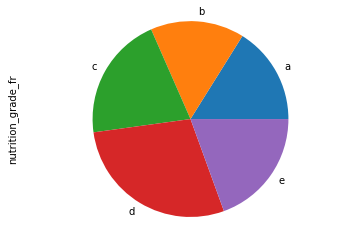

In [26]:
df = DATA["nutrition_grade_fr"].value_counts(normalize=True).sort_index()
print(df)
df.plot(kind="pie")
plt.axis('equal') 
plt.show()

La totalité des valeurs du nutriscore sont correctement représentées.  
Il y a une légère sur-représentation de la valeur "d", mais qui peut être réelle.  
On remarque que presque 50% des produits ont un nutriscore "d" ou inférieur.

#### Statistique sur l'empreinte carbone

a    62
b    62
c    58
d    35
e    51
Name: carbon_grade, dtype: int64


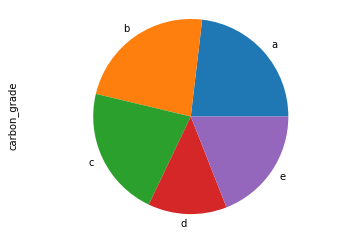

In [27]:
df = DATA["carbon_grade"].value_counts(normalize=False).sort_index()
print(df)
df.plot(kind="pie")
plt.axis('equal') 
plt.show()

La totalité des valeurs du carbone score sont correctement représentées, avec une légère sous-représentation de la valeur "d".  
Presque 50% des produits ont des carbone scores "a" ou "b".  
On peut se demander si cette observation est réelle ou si les produits avec un faible impacte carbone sont sur représentés dans l'échantillon.

#### Analyse du lieux de fabrication
Les variables contenues dans des listes ne peuvent pas être facilement analysées,  
j'ai décidé de créer une ligne par valeur,  
Cela va engendrer des doublons mais permet d'analyser plus simplement la variable

In [57]:
#data_no_list = remove_lists(DATA, column="manufacturing_places_tags")
data_no_list = DATA.explode("manufacturing_places_tags")
print(data_no_list[data_no_list['nb_manufacturing_places_tags'] > 1 ]['manufacturing_places_tags'])

56538            england
56538     united-kingdom
56640           scotland
56640     united-kingdom
57279            ecuador
               ...      
318870         australia
318926       new-zealand
318926         australia
320094          thailand
320094         australia
Name: manufacturing_places_tags, Length: 750, dtype: object


In [58]:
country = np.unique(data_no_list[pd.notnull(data_no_list['manufacturing_places_tags'])]["manufacturing_places_tags"].values)
print(f"Nombre de pays différent = {len(country)}")
counter = data_no_list['manufacturing_places_tags'].value_counts(normalize=True)
print(counter)

Nombre de pays différent = 113
france                              0.534713
spain                               0.101941
germany                             0.070140
italy                               0.058207
belgium                             0.032401
                                      ...   
ukraine                             0.000029
lao-people's-democratic-republic    0.000029
maldives                            0.000029
sao-tome-and-principe               0.000029
malta                               0.000029
Name: manufacturing_places_tags, Length: 113, dtype: float64


Nombre de pays représentant moins de 1% = 103


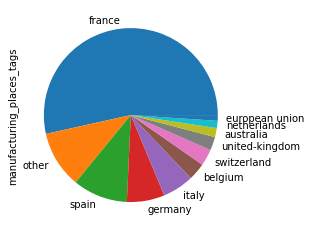

In [59]:
other_country = list(counter[counter<0.01].index)
#print(other_country)
print(f"Nombre de pays représentant moins de 1% = {len(other_country)}")
data_no_list['manufacturing_places_tags'] = data_no_list['manufacturing_places_tags'].apply(lambda x : x if x not in other_country else "other")
counter = data_no_list['manufacturing_places_tags'].value_counts(normalize=False)
counter.plot(kind='pie')
plt.show()

La france semble sur représenté dans les lieux de transformations.  
Il est peut probable que la france représente 50% de la fabrication des produits alimentaires.  
Cela peut signifier que des nombreux collaborateurs se trouvent en France.

#### Analyse du lieux d'origines des ingrédients

In [60]:
data_no_list = DATA.explode("origins_tags")
print(data_no_list[data_no_list['nb_origins_tags'] > 1 ]['origins_tags'])

692             scotland
692       united-kingdom
894                spain
894       united-kingdom
16019              china
               ...      
320589         indonesia
320598          malaysia
320598         indonesia
320600          malaysia
320600         indonesia
Name: origins_tags, Length: 2087, dtype: object


In [61]:
country = np.unique(data_no_list[pd.notnull(data_no_list['origins_tags'])]["origins_tags"].values)
print(f"Nombre de pays différent = {len(country)}")
counter = data_no_list['origins_tags'].value_counts(normalize=True)
print(counter)

Nombre de pays différent = 144
france            0.397555
european union    0.079265
spain             0.076669
italy             0.049948
germany           0.037154
                    ...   
rwanda            0.000047
zambia            0.000047
guam              0.000047
sudan             0.000047
mozambique        0.000047
Name: origins_tags, Length: 144, dtype: float64


Nombre de pays représentant moins de 1% = 134


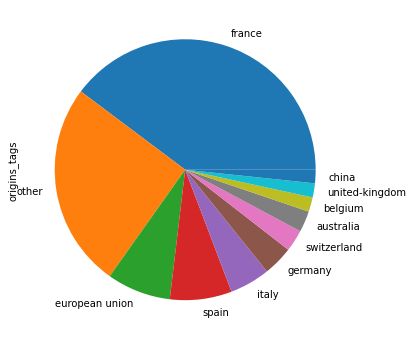

In [62]:
other_country = list(counter[counter<0.015].index)
print(f"Nombre de pays représentant moins de 1% = {len(other_country)}")
data_no_list['origins_tags'] = data_no_list['origins_tags'].apply(lambda x : x if x not in other_country else "other")
counter = data_no_list['origins_tags'].value_counts(normalize=False)
counter.plot(kind='pie', figsize=(15,6))
plt.show()

La france est encore très représentée.  
On note aussi une part importante de "autre".  
Cela traduit une grande diversité de l'origines des produits

#### Analyse des catégories

In [63]:
data_no_list = DATA.explode("categories_tags")

In [64]:
categ = np.unique(data_no_list[pd.notnull(data_no_list['categories_tags'])]["categories_tags"].values)
print(f"Nombre de catégories différentes = {len(categ)}")

Nombre de catégories différentes = 12850


In [65]:
counter = data_no_list["categories_tags"].value_counts()/len(data_no_list[pd.notnull(data_no_list["categories_tags"])])
other_categ = list(counter[counter<10].index)
print(f"Nombre de catégories attribuées à 2 ou moins produits = {len(other_categ)}")

Nombre de catégories attribuées à 2 ou moins produits = 12850


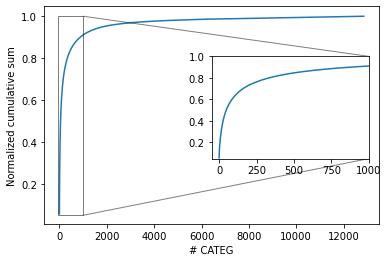

In [66]:
fig, ax = plt.subplots()
counter.cumsum().plot(use_index=False, ax=ax)
# inset axes....
axins = ax.inset_axes([0.5, 0.3, 0.47, 0.47])
counter.cumsum().plot(use_index=False, ax=axins)
axins.set_xlim(-50, 1000)
axins.set_ylim(0.05,1)
#axins.set_ylim(y1, y2)
ax.indicate_inset_zoom(axins, edgecolor="black")
ax.set_xlabel("# CATEG")
ax.set_ylabel("Normalized cumulative sum")
plt.show()

La grande majorité des catégories n'est attribuée qu'à un faible nombre de produits.  
les 500 plus fréquentes catégories représentes plus de 80% des produits.  
Il faudrait regrouper les catégories en un nombre plus faible (analyse des composantes principales, voir plus tard)

#### Analyse des catégories PNNS
#### groupe 1

In [67]:
categ = np.unique(DATA[pd.notnull(DATA['pnns_groups_1'])]["pnns_groups_1"].values)
print(f"Nombre de catégories différentes = {len(categ)}")

Nombre de catégories différentes = 9


sugary_snacks              12864
beverages                   9033
milk_and_dairy_products     8825
cereals_and_potatoes        8458
fish_meat_eggs              8041
fruits_and_vegetables       6895
composite_foods             6747
fat_and_sauces              5216
salty_snacks                2810
Name: pnns_groups_1, dtype: int64


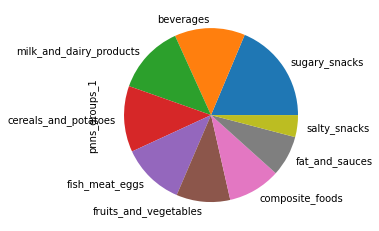

In [68]:
counter = DATA["pnns_groups_1"].value_counts()
print(counter)
counter.plot(kind='pie')
plt.show()

Le PNNS_goups_1 permet de gégnérer moins de catégories que la variable categories_tags.  
Chaque catégorie est bien représentée.

#### groupe 2

In [69]:
categ = np.unique(DATA[pd.notnull(DATA['pnns_groups_2'])]["pnns_groups_2"].values)
print(f"Nombre de catégories différentes = {len(categ)}")

Nombre de catégories différentes = 36


compte tenu du nombre important de catégories, elles ne seront pas représentées en diagramme.

In [70]:
counter = DATA["pnns_groups_2"].value_counts()
print(counter)

one_dish_meals                      5546
sweets                              4698
biscuits_and_cakes                  4561
non_sugared_beverages               4302
cereals                             4118
cheese                              4024
vegetables                          3774
dressings_and_sauces                3602
milk_and_yogurt                     3297
processed_meat                      3247
chocolate_products                  3109
alcoholic_beverages                 2909
fish_and_seafood                    2638
sweetened_beverages                 2170
fruits                              2121
appetizers                          2101
fruit_juices                        1924
bread                               1838
meat                                1694
fats                                1614
breakfast_cereals                   1408
legumes                              929
dairy_desserts                       783
ice_cream                            721
nuts            

### Analyses des variables quantitatives discrètes
#### Nombre d'additifs

Nombre de valeurs uniques = 31
Nombre moyen d'additif par produits = 1.94
Nombre médian d'additif par produits = 1.00
Deviation standard du nombre d'additifs par produit = 2.50
Mesure d'asymétrie de la distribution = 2.18
Mesure d'aplatissement de la distribution = 7.42


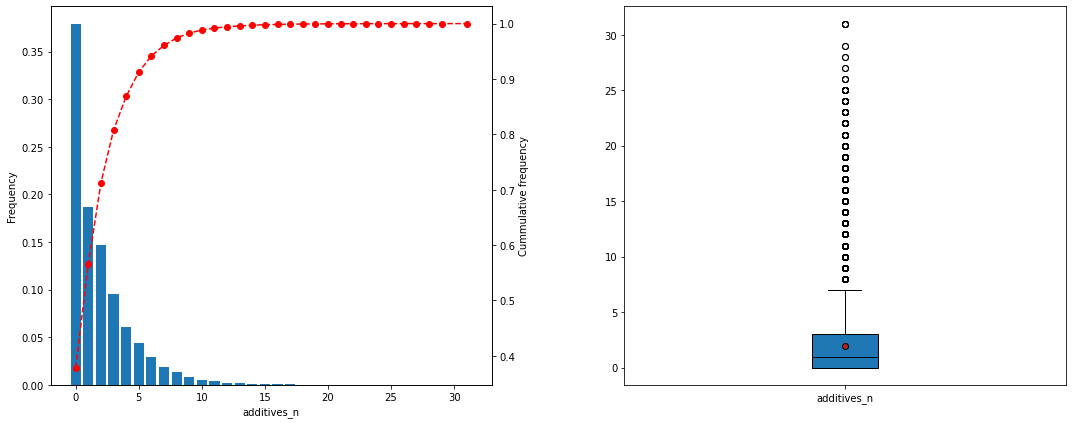

In [71]:
df = DATA["additives_n"].value_counts(normalize=True).sort_index()
print(f"Nombre de valeurs uniques = {len(df)}")
print(f"Nombre moyen d'additif par produits = {DATA['additives_n'].mean():.2f}")
print(f"Nombre médian d'additif par produits = {DATA['additives_n'].median():.2f}")
print(f"Deviation standard du nombre d'additifs par produit = {DATA['additives_n'].std():.2f}")
print(f"Mesure d'asymétrie de la distribution = {DATA['additives_n'].skew():.2f}")
print(f"Mesure d'aplatissement de la distribution = {DATA['additives_n'].kurtosis():.2f}")

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
ax3 = ax1.twinx()
ax1.bar(df.index, df.values)
ax3.plot(df.index, df.values.cumsum(), linestyle='--', marker='o', color='red')
ax1.set_xlabel("additives_n")
ax1.set_ylabel("Frequency")
ax3.set_ylabel("Cummulative frequency")
ax2.boxplot(DATA[pd.notnull(DATA["additives_n"])]["additives_n"], vert=True, labels=["additives_n"], 
            medianprops=medianprops, patch_artist=True, showmeans=True, meanprops=meanprops)
fig.tight_layout()
plt.subplots_adjust(wspace=0.3)
plt.show()

### Analyse des variables quantitatives continues
#### Détection des valeurs atypiques

------------------------------------------------------------
          | energy_100g |
Moyenne = 1141.91
Mediane = 1100.00
Deviation standard = 6447.15
Mesure d'asymétrie de la distribution = 491.00
Mesure d'aplatissement de la distribution = 247388.17
Nombre de bins (règle de Sturges) = 19


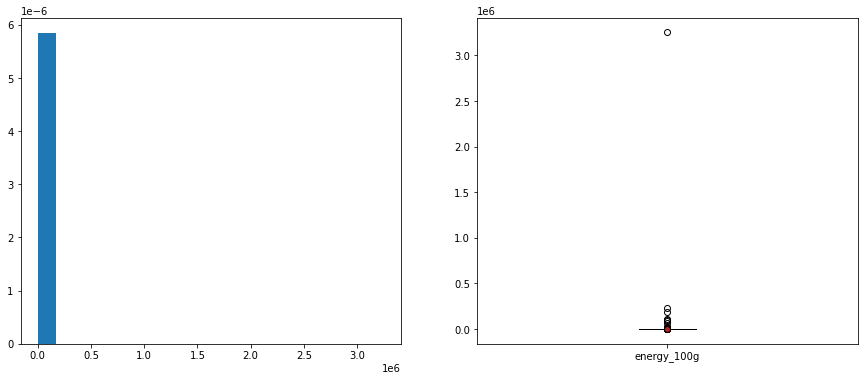

------------------------------------------------------------
          | fat_100g |
Moyenne = 12.73
Mediane = 5.00
Deviation standard = 17.50
Mesure d'asymétrie de la distribution = 2.19
Mesure d'aplatissement de la distribution = 6.15
Nombre de bins (règle de Sturges) = 19


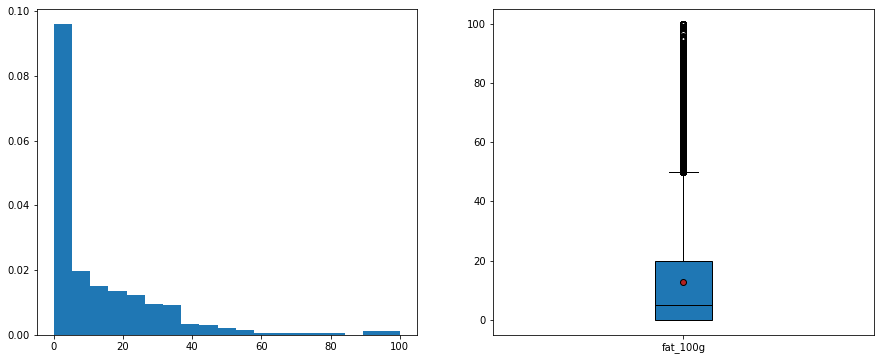

------------------------------------------------------------
          | saturated-fat_100g |
Moyenne = 5.13
Mediane = 1.79
Deviation standard = 7.91
Mesure d'asymétrie de la distribution = 3.46
Mesure d'aplatissement de la distribution = 22.06
Nombre de bins (règle de Sturges) = 19


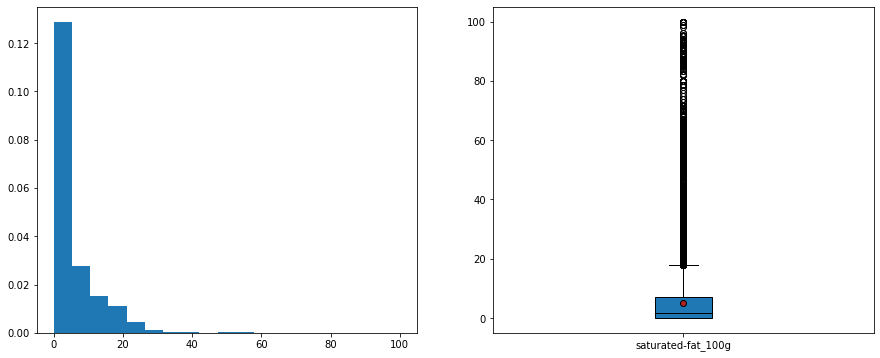

------------------------------------------------------------
          | fruits-vegetables-nuts_100g |
Moyenne = 31.46
Mediane = 23.00
Deviation standard = 31.97
Mesure d'asymétrie de la distribution = 0.68
Mesure d'aplatissement de la distribution = -0.70
Nombre de bins (règle de Sturges) = 19


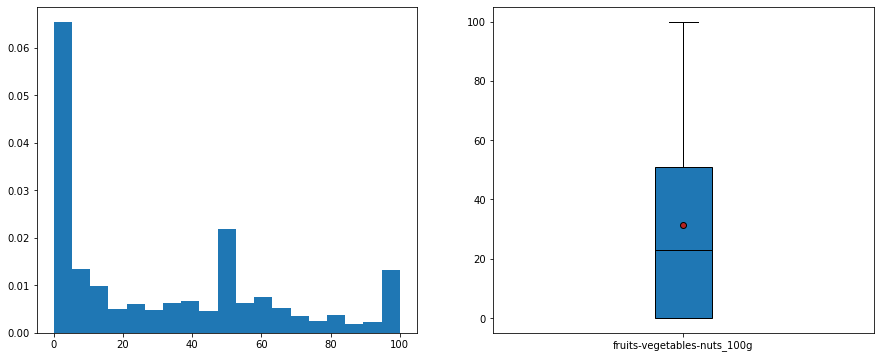

------------------------------------------------------------
          | sodium_100g |
Moyenne = 0.65
Mediane = 0.23
Deviation standard = 2.66
Mesure d'asymétrie de la distribution = 11.50
Mesure d'aplatissement de la distribution = 161.20
Nombre de bins (règle de Sturges) = 19


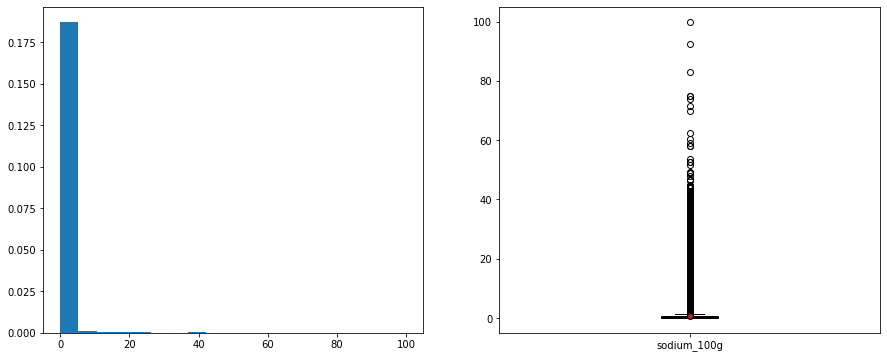

------------------------------------------------------------
          | sugars_100g |
Moyenne = 15.99
Mediane = 5.71
Deviation standard = 21.17
Mesure d'asymétrie de la distribution = 1.67
Mesure d'aplatissement de la distribution = 2.23
Nombre de bins (règle de Sturges) = 19


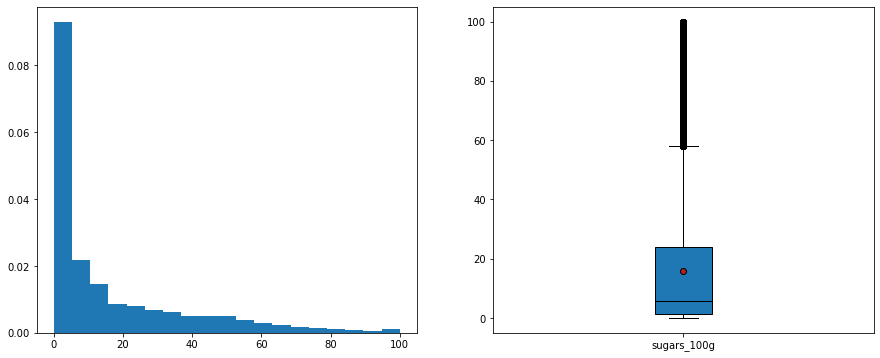

------------------------------------------------------------
          | carbon-footprint_100g |
Moyenne = 341.70
Mediane = 195.75
Deviation standard = 425.21
Mesure d'asymétrie de la distribution = 2.77
Mesure d'aplatissement de la distribution = 10.29
Nombre de bins (règle de Sturges) = 19


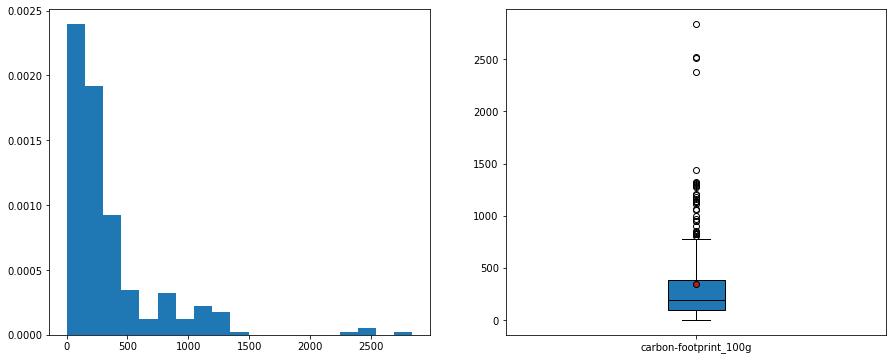

In [72]:
for variable in ['energy_100g', 'fat_100g', 'saturated-fat_100g', 
                 'fruits-vegetables-nuts_100g', 'sodium_100g', 'sugars_100g', 'carbon-footprint_100g'] :
    print("-"*60)
    print(' '*10+"="*(len(variable)+4))
    print(' '*10+"| "+variable+' |')
    print(' '*10+"="*(len(variable)+4))
    
    print(f"Moyenne = {DATA[variable].mean():.2f}")
    print(f"Mediane = {DATA[variable].median():.2f}")
    print(f"Deviation standard = {DATA[variable].std():.2f}")
    print(f"Mesure d'asymétrie de la distribution = {DATA[variable].skew():.2f}")
    print(f"Mesure d'aplatissement de la distribution = {DATA[variable].kurtosis():.2f}")
    
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
    medianprops = {'color':"black"}
    meanprops = {'marker':'o', 'markeredgecolor':'black',
                'markerfacecolor':'firebrick'}
    n_bins = int(1+np.log2(len(DATA[variable])))
    print(f"Nombre de bins (règle de Sturges) = {n_bins}")
    ax1.hist(DATA[variable], density=True, bins=n_bins)
    ax2.boxplot(DATA[pd.notnull(DATA[variable])][variable], vert=True, labels=[variable], 
            medianprops=medianprops, patch_artist=True, showmeans=True, meanprops=meanprops)
    plt.show()

Ces anlyses permettent de détecter plus facilement les outliers.  
Les outliers sétectés et les actions à réalisées sont :  
- energy_100g > 5000, il apparait peu probable que ces valeurs soient possible : suppression des valeurs
- saturated-fat_100g > 60, ces valeurs sont atypiques et peu représentées : suppression des valeurs
- sodium_100g > 50, ces valeurs sont atypiques (sauf pour des produits bien particuliers, comme le sel par ex), ne rien faire
- carbon-footprint_100g > 2000, ces valeurs sont atypiques : suppression

#### Suppression des outliers

In [73]:
DATA["energy_100g"] = DATA["energy_100g"].apply(is_lower, target=5000)

5690.0 is higher than the target 5000
5439.0 is higher than the target 5000
10757.0 is higher than the target 5000
6975.0 is higher than the target 5000
6276.0 is higher than the target 5000
13213.0 is higher than the target 5000
6694.0 is higher than the target 5000
6694.0 is higher than the target 5000
14644.0 is higher than the target 5000
5577.0 is higher than the target 5000
5054.0 is higher than the target 5000
10966.0 is higher than the target 5000
11954.0 is higher than the target 5000
5577.0 is higher than the target 5000
5577.0 is higher than the target 5000
6849.0 is higher than the target 5000
110579.0 is higher than the target 5000
6975.0 is higher than the target 5000
14347.0 is higher than the target 5000
94140.0 is higher than the target 5000
8523.0 is higher than the target 5000
8523.0 is higher than the target 5000
5439.0 is higher than the target 5000
6276.0 is higher than the target 5000
5577.0 is higher than the target 5000
7012.0 is higher than the target 5000
268

In [74]:
DATA["saturated-fat_100g"] = DATA["saturated-fat_100g"].apply(is_lower, target=60)

85.71 is higher than the target 60
61.29 is higher than the target 60
66.7 is higher than the target 60
92.86 is higher than the target 60
92.86 is higher than the target 60
92.86 is higher than the target 60
92.86 is higher than the target 60
85.71 is higher than the target 60
85.71 is higher than the target 60
85.71 is higher than the target 60
64.0 is higher than the target 60
92.86 is higher than the target 60
92.86 is higher than the target 60
92.86 is higher than the target 60
85.71 is higher than the target 60
92.86 is higher than the target 60
85.71 is higher than the target 60
85.71 is higher than the target 60
85.71 is higher than the target 60
85.71 is higher than the target 60
85.7 is higher than the target 60
85.71 is higher than the target 60
85.7 is higher than the target 60
85.71 is higher than the target 60
85.71 is higher than the target 60
80.0 is higher than the target 60
92.86 is higher than the target 60
85.71 is higher than the target 60
92.86 is higher than the 

64.0 is higher than the target 60
63.5 is higher than the target 60
74.0 is higher than the target 60
61.1 is higher than the target 60
63.5 is higher than the target 60
85.0 is higher than the target 60
82.1 is higher than the target 60
73.0 is higher than the target 60
90.4 is higher than the target 60
85.5 is higher than the target 60
87.0 is higher than the target 60
78.0 is higher than the target 60
88.96 is higher than the target 60
88.96 is higher than the target 60
90.0 is higher than the target 60
87.0 is higher than the target 60
84.0 is higher than the target 60
66.0 is higher than the target 60
96.0 is higher than the target 60
84.0 is higher than the target 60
95.0 is higher than the target 60
95.0 is higher than the target 60
95.0 is higher than the target 60
64.9 is higher than the target 60
91.0 is higher than the target 60
91.0 is higher than the target 60
64.0 is higher than the target 60
64.0 is higher than the target 60
92.0 is higher than the target 60
92.0 is high

In [75]:
DATA["carbon-footprint_100g"] = DATA["carbon-footprint_100g"].apply(is_lower, target=2000)

2520.0 is higher than the target 2000
2380.0 is higher than the target 2000
2509.0 is higher than the target 2000
2842.0 is higher than the target 2000


#### Représentations des données sans outliers

------------------------------------------------------------
          | energy_100g |
Moyenne = 1124.54
Mediane = 1100.00
Deviation standard = 797.58
Mesure d'asymétrie de la distribution = 0.47
Mesure d'aplatissement de la distribution = -0.34
Nombre de bins (règle de Sturges) = 19


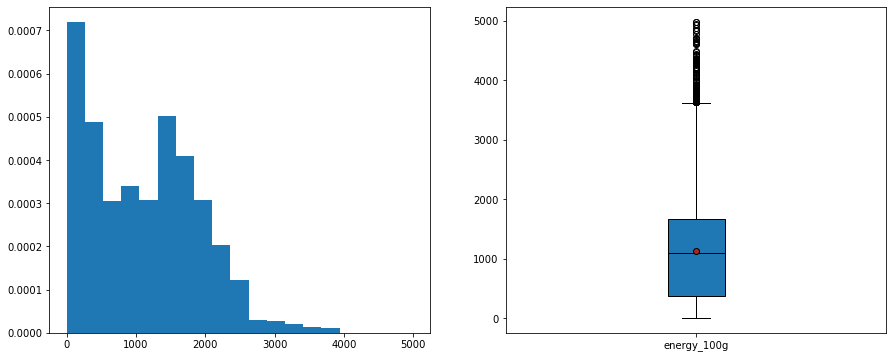

------------------------------------------------------------
          | fat_100g |
Moyenne = 12.73
Mediane = 5.00
Deviation standard = 17.50
Mesure d'asymétrie de la distribution = 2.19
Mesure d'aplatissement de la distribution = 6.15
Nombre de bins (règle de Sturges) = 19


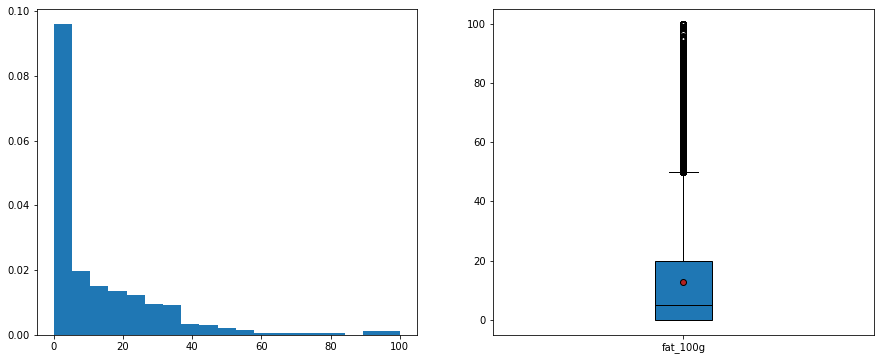

------------------------------------------------------------
          | saturated-fat_100g |
Moyenne = 5.00
Mediane = 1.79
Deviation standard = 7.27
Mesure d'asymétrie de la distribution = 2.47
Mesure d'aplatissement de la distribution = 9.42
Nombre de bins (règle de Sturges) = 19


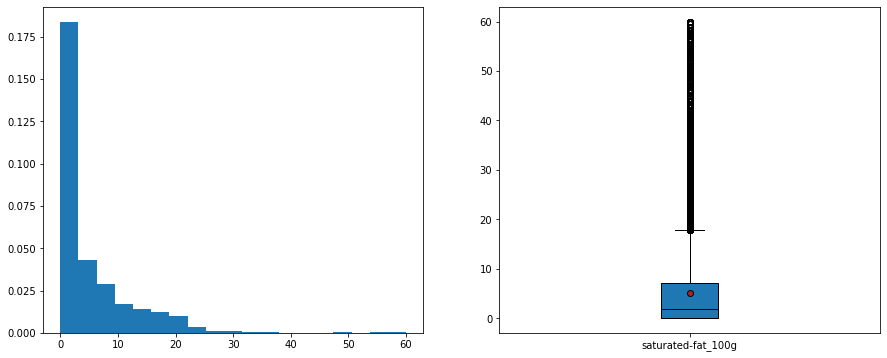

------------------------------------------------------------
          | fruits-vegetables-nuts_100g |
Moyenne = 31.46
Mediane = 23.00
Deviation standard = 31.97
Mesure d'asymétrie de la distribution = 0.68
Mesure d'aplatissement de la distribution = -0.70
Nombre de bins (règle de Sturges) = 19


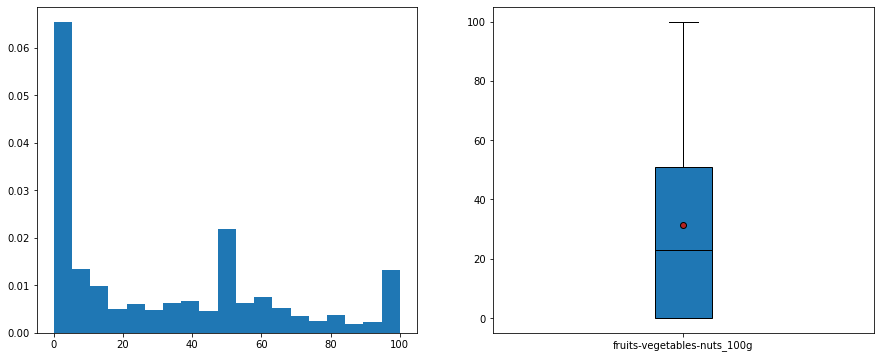

------------------------------------------------------------
          | sodium_100g |
Moyenne = 0.65
Mediane = 0.23
Deviation standard = 2.66
Mesure d'asymétrie de la distribution = 11.50
Mesure d'aplatissement de la distribution = 161.20
Nombre de bins (règle de Sturges) = 19


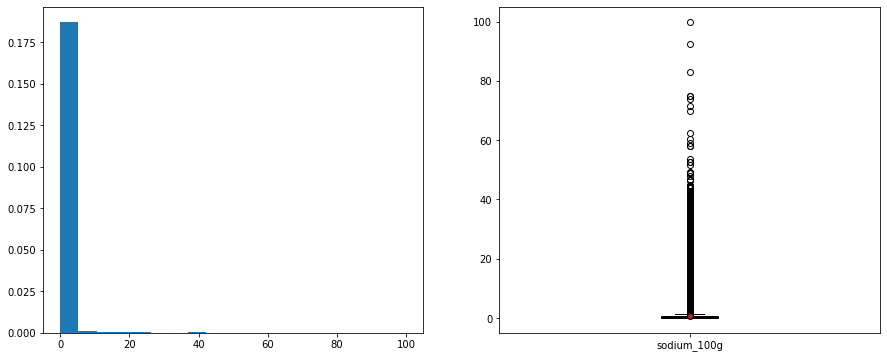

------------------------------------------------------------
          | sugars_100g |
Moyenne = 15.99
Mediane = 5.71
Deviation standard = 21.17
Mesure d'asymétrie de la distribution = 1.67
Mesure d'aplatissement de la distribution = 2.23
Nombre de bins (règle de Sturges) = 19


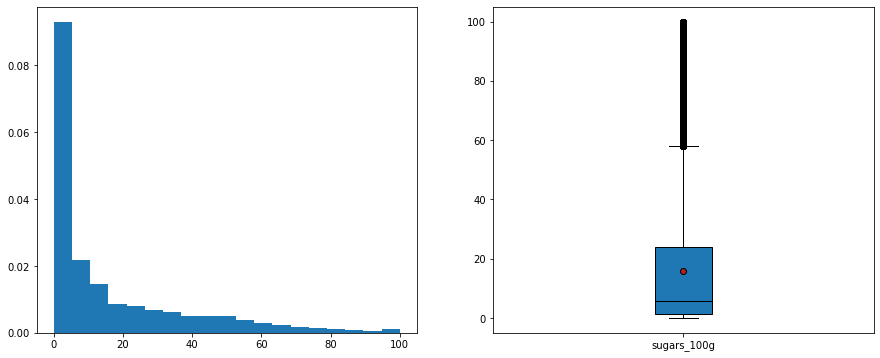

------------------------------------------------------------
          | carbon-footprint_100g |
Moyenne = 308.05
Mediane = 192.65
Deviation standard = 327.03
Mesure d'asymétrie de la distribution = 1.61
Mesure d'aplatissement de la distribution = 1.93
Nombre de bins (règle de Sturges) = 19


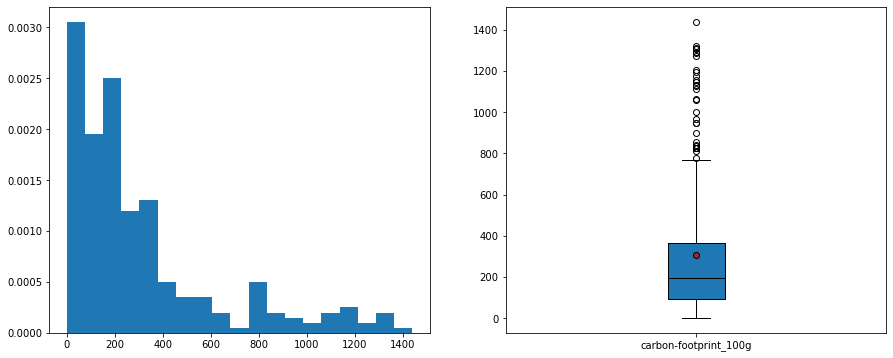

In [43]:
for variable in ['energy_100g', 'fat_100g', 'saturated-fat_100g', 
                 'fruits-vegetables-nuts_100g', 'sodium_100g', 'sugars_100g', 'carbon-footprint_100g'] :
    print("-"*60)
    print(' '*10+"="*(len(variable)+4))
    print(' '*10+"| "+variable+' |')
    print(' '*10+"="*(len(variable)+4))
    
    print(f"Moyenne = {DATA[variable].mean():.2f}")
    print(f"Mediane = {DATA[variable].median():.2f}")
    print(f"Deviation standard = {DATA[variable].std():.2f}")
    print(f"Mesure d'asymétrie de la distribution = {DATA[variable].skew():.2f}")
    print(f"Mesure d'aplatissement de la distribution = {DATA[variable].kurtosis():.2f}")
    
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
    medianprops = {'color':"black"}
    meanprops = {'marker':'o', 'markeredgecolor':'black',
                'markerfacecolor':'firebrick'}
    n_bins = int(1+np.log2(len(DATA[variable])))
    print(f"Nombre de bins (règle de Sturges) = {n_bins}")
    ax1.hist(DATA[variable], density=True, bins=n_bins)
    ax2.boxplot(DATA[pd.notnull(DATA[variable])][variable], vert=True, labels=[variable], 
            medianprops=medianprops, patch_artist=True, showmeans=True, meanprops=meanprops)
    plt.show()